<a href="https://colab.research.google.com/github/AyoubSah/Crypto-Currency-Regression/blob/main/Crypto_regression_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

Lire les Données a partir du fichier csv

In [ ]:
data = pd.read_csv('Crypto.csv')

In [ ]:
df = data.copy()
data.shape

(12632, 49)

Afficher les différents types des données avec leurs fréquences

In [ ]:
data.dtypes.value_counts()

float64    46
int64       2
object      1
dtype: int64

HeatMap pour avoir une idée sur les valeurs manquantes

<Axes: >

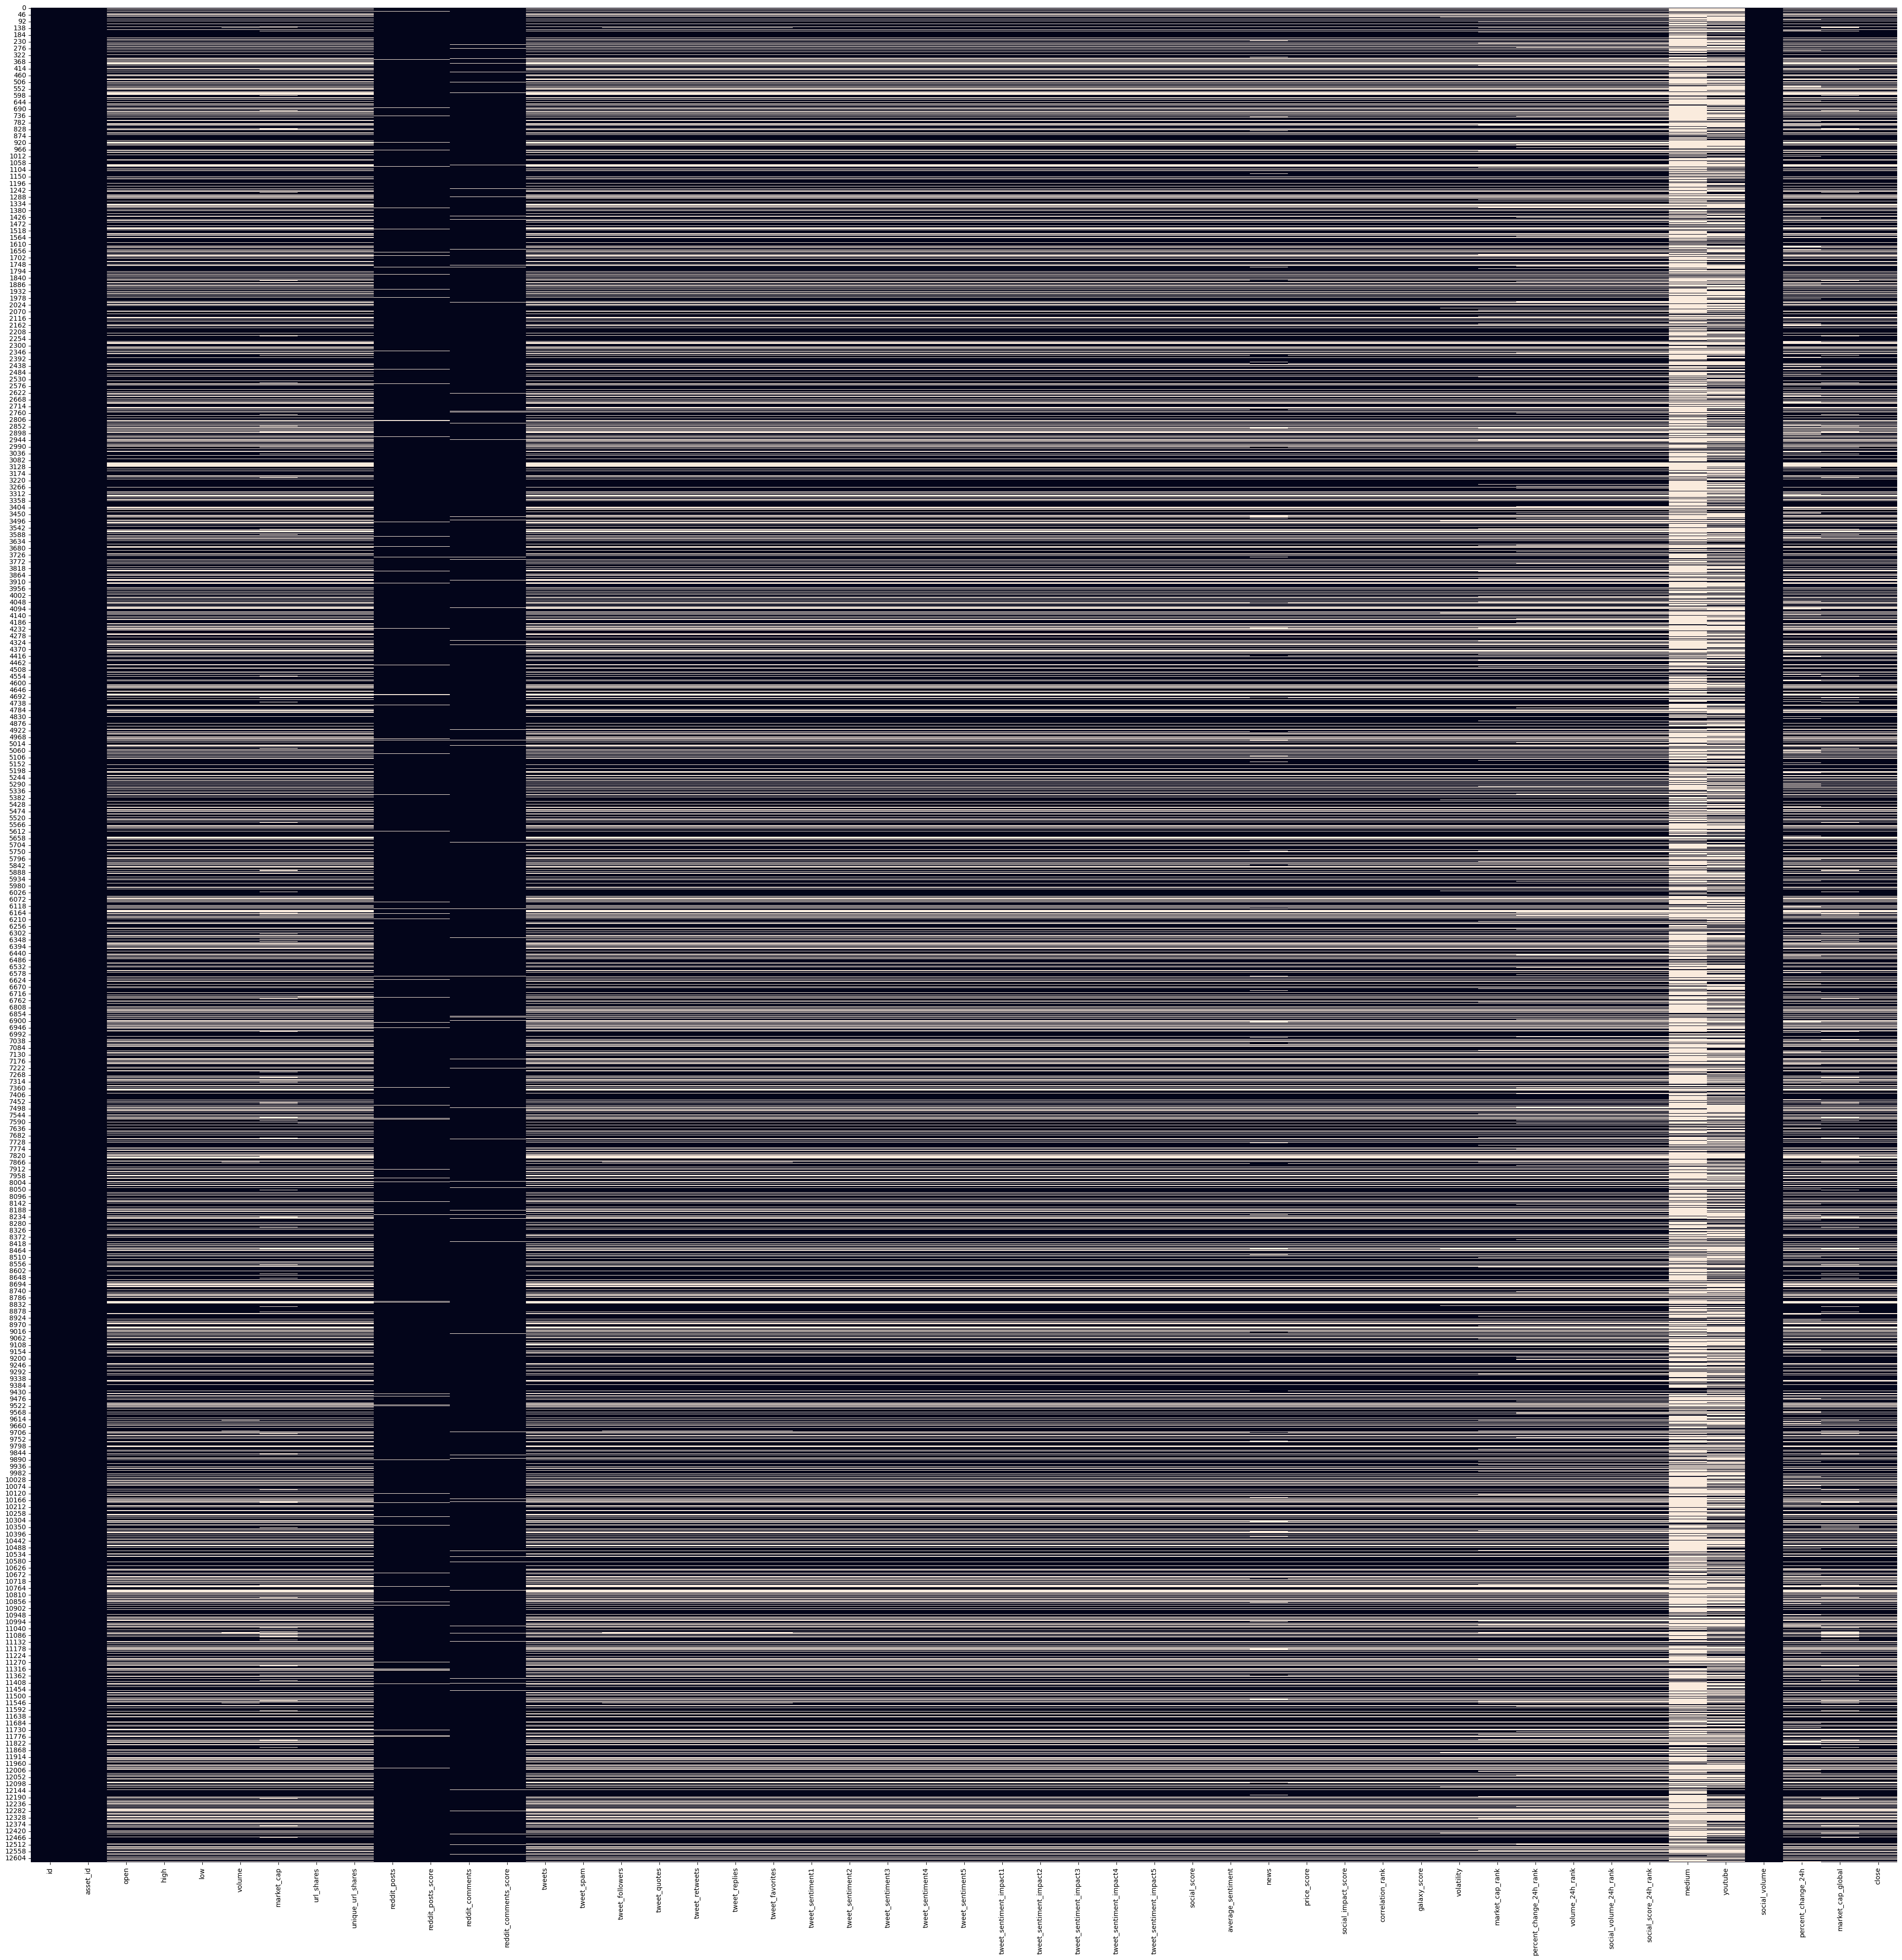

In [ ]:
plt.figure(figsize = (50, 50))
sns.heatmap(data.isna(), cbar = False)

Calculer la proportion des valeurs null de chaque attribut

In [ ]:
(data.isna().sum()/data.shape[0]).sort_values(ascending = True)

id                         0.000000
asset_id                   0.000000
social_volume              0.000000
reddit_comments_score      0.018208
reddit_comments            0.018208
reddit_posts_score         0.019079
reddit_posts               0.019079
close                      0.317844
open                       0.317844
low                        0.317844
high                       0.317844
volume                     0.318794
tweet_sentiment_impact4    0.320456
galaxy_score               0.320456
correlation_rank           0.320456
social_impact_score        0.320456
price_score                0.320456
average_sentiment          0.320456
social_score               0.320456
tweet_sentiment_impact5    0.320456
tweet_sentiment_impact3    0.320456
tweet_sentiment_impact2    0.320456
tweet_sentiment_impact1    0.320456
tweet_sentiment5           0.320456
tweets                     0.320456
tweet_sentiment3           0.320456
tweet_sentiment2           0.320456
tweet_sentiment1           0

On choisit de supprimer la colonne "medium" Car elle a plus de 70% de valeurs manquantes

In [ ]:
for col in data.columns:
  print(f'{col:-<50} {data[col].nunique()}')

id------------------------------------------------ 12632
asset_id------------------------------------------ 1
open---------------------------------------------- 8581
high---------------------------------------------- 8580
low----------------------------------------------- 8581
volume-------------------------------------------- 8568
market_cap---------------------------------------- 8346
url_shares---------------------------------------- 2128
unique_url_shares--------------------------------- 1342
reddit_posts-------------------------------------- 202
reddit_posts_score-------------------------------- 1502
reddit_comments----------------------------------- 471
reddit_comments_score----------------------------- 1330
tweets-------------------------------------------- 5119
tweet_spam---------------------------------------- 3174
tweet_followers----------------------------------- 8536
tweet_quotes-------------------------------------- 744
tweet_retweets------------------------------------ 29

Après avoir calculer les valeurs uniques, on voit ceux qui ont le moindre des valeurs uniques et ses fréquences d'apparition

In [ ]:
for col in data.columns:
  #print(data[col].unique())
  if data[col].nunique() < 10:
    print(f'{col:-<50} {data[col].unique()}')

asset_id------------------------------------------ [1]
market_cap_rank----------------------------------- [ 1. nan  2.  4.  6.]
volume_24h_rank----------------------------------- [ 2. nan  3.  1.  4.  9. 10.  5.]
social_volume_24h_rank---------------------------- [ 1. nan  2.]
social_score_24h_rank----------------------------- [ 1. nan  2.]


In [ ]:
print(data['market_cap_rank'].value_counts())
print('Number of nan values: ', data['social_volume_24h_rank'].isna().sum())

1.0    8309
2.0       3
4.0       1
6.0       1
Name: market_cap_rank, dtype: int64
Number of nan values:  4525


In [ ]:
print(data['volume_24h_rank'].value_counts())
print('Number of nan values: ', data['social_volume_24h_rank'].isna().sum())

2.0     6694
3.0     1155
1.0      215
4.0       40
9.0        1
10.0       1
5.0        1
Name: volume_24h_rank, dtype: int64
Number of nan values:  4525


In [ ]:
print(data['social_volume_24h_rank'].value_counts())
print('Number of nan values: ', data['social_volume_24h_rank'].isna().sum())

1.0    7955
2.0     152
Name: social_volume_24h_rank, dtype: int64
Number of nan values:  4525


In [ ]:
print(data['social_score_24h_rank'].value_counts())
print('Number of nan values: ', data['social_score_24h_rank'].isna().sum())

1.0    8059
2.0      48
Name: social_score_24h_rank, dtype: int64
Number of nan values:  4525


On a choisit de garder ces colonnes, donc on supprime uniquement la colonne "medium" avec les IDs

In [ ]:
df.drop('asset_id', axis = 1, inplace = True)
df.drop('id', axis = 1, inplace = True)
df.drop('medium', axis = 1, inplace = True)
#df.drop('social_score_24h_rank', axis = 1, inplace = True)
#df.drop('social_volume_24h_rank', axis = 1, inplace = True)
#df.drop('volume_24h_rank', axis = 1, inplace = True)
#df.drop('market_cap_rank', axis = 1, inplace = True)
columns = df.columns

In [ ]:
df.shape

(12632, 46)

Séparition des entrés/sorties du modèle

In [ ]:
X = df.iloc[:, :-1].values
Y = df.iloc[:, -1].values

Remplissage des valeurs manquantes avec la moyenne

In [ ]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(missing_values = np.nan, strategy = 'mean')
imputer = imputer.fit(X)
X = imputer.transform(X)
imputer = imputer.fit(Y.reshape(-1, 1))
Y = imputer.transform(Y.reshape(-1, 1))


In [ ]:
df = pd.DataFrame(np.concatenate((X, Y), axis = 1), columns = columns)
df.isna().sum()

open                       0
high                       0
low                        0
volume                     0
market_cap                 0
url_shares                 0
unique_url_shares          0
reddit_posts               0
reddit_posts_score         0
reddit_comments            0
reddit_comments_score      0
tweets                     0
tweet_spam                 0
tweet_followers            0
tweet_quotes               0
tweet_retweets             0
tweet_replies              0
tweet_favorites            0
tweet_sentiment1           0
tweet_sentiment2           0
tweet_sentiment3           0
tweet_sentiment4           0
tweet_sentiment5           0
tweet_sentiment_impact1    0
tweet_sentiment_impact2    0
tweet_sentiment_impact3    0
tweet_sentiment_impact4    0
tweet_sentiment_impact5    0
social_score               0
average_sentiment          0
news                       0
price_score                0
social_impact_score        0
correlation_rank           0
galaxy_score  

In [ ]:
df.describe()

open          high           low        volume    market_cap  \
count  12632.000000  12632.000000  12632.000000  1.263200e+04  1.263200e+04   
mean   15504.816128  15559.484568  15449.591187  1.300724e+09  2.826010e+11   
std    11650.080611  11720.610486  11581.481856  1.412912e+09  2.168857e+11   
min     4545.087790   4589.712024   4267.292258  2.373622e+08  8.393765e+10   
25%     9166.191988   9176.126648   9150.604614  7.653442e+08  1.675602e+11   
50%    11871.662650  11879.876286  11851.583214  1.300724e+09  2.201686e+11   
75%    15504.816128  15559.484568  15449.591187  1.300724e+09  2.826010e+11   
max    61408.929761  61507.371480  61073.192884  5.185678e+10  1.140905e+12   

         url_shares  unique_url_shares  reddit_posts  reddit_posts_score  \
count  12632.000000       12632.000000  12632.000000        12632.000000   
mean    1247.310437         757.862857     36.527722          323.989831   
std      488.660068         250.157672     31.307261          670.925838   
min        2.000000           2.000000      1.000000            0.000000   
25%      985.000000         630.000000     13.000000           80.000000   
50%     1247.310437         757.862857     29.000000          159.000000   
75%     1309.000000         790.000000     50.000000          323.989831   
max    10107.000000        4880.000000    500.000000        30559.000000   

       reddit_comments  ...  market_cap_rank  percent_change_24h_rank  \
count     12632.000000  ...     12632.000000             12632.000000   
mean        101.397436  ...         1.001323               809.518811   
std          88.656150  ...         0.054112               180.583410   
min           1.000000  ...         1.000000               124.000000   
25%          41.000000  ...         1.000000               754.000000   
50%          66.000000  ...         1.000000               809.518811   
75%         140.000000  ...         1.001323               884.000000   
max        1333.000000  ...         6.000000              1490.000000   

       volume_24h_rank  social_volume_24h_rank  social_score_24h_rank  \
count     12632.000000            12632.000000           12632.000000   
mean          2.128037                1.018749               1.005921   
std           0.346796                0.108666               0.061463   
min           1.000000                1.000000               1.000000   
25%           2.000000                1.000000               1.000000   
50%           2.000000                1.000000               1.000000   
75%           2.128037                1.018749               1.005921   
max          10.000000                2.000000               2.000000   

            youtube  social_volume  percent_change_24h  market_cap_global  \
count  12632.000000   12632.000000        12632.000000       1.263200e+04   
mean       3.138947    3920.713268            0.375253       4.616824e+11   
std        3.366963    4824.053810            3.038760       3.737775e+11   
min        1.000000       1.000000          -44.690403       1.223398e+11   
25%        3.000000     243.000000           -0.357315       2.548061e+11   
50%        3.138947    3334.000000            0.375253       3.893574e+11   
75%        3.138947    5178.000000            0.868350       4.616824e+11   
max      178.000000  140431.000000           34.932303       2.062215e+12   

              close  
count  12632.000000  
mean   15507.395867  
std    11655.610279  
min     4267.292258  
25%     9164.102748  
50%    11867.678610  
75%    15507.395867  
max    61259.670876  

[8 rows x 46 columns]

In [ ]:
df.head()

open          high           low        volume    market_cap  \
0   9422.849081   9428.490628   9422.849081  7.131986e+08  1.737635e+11   
1   7985.359278   7992.059917   7967.567267  4.004755e+08  1.426942e+11   
2  49202.033778  49394.593518  49068.057046  3.017729e+09  9.166977e+11   
3  15504.816128  15559.484568  15449.591187  1.300724e+09  2.826010e+11   
4  10535.737119  10535.737119  10384.798216  1.150053e+09  1.921183e+11   

    url_shares  unique_url_shares  reddit_posts  reddit_posts_score  \
0  1689.000000         817.000000          55.0               105.0   
1   920.000000         544.000000          20.0               531.0   
2  1446.000000         975.000000          72.0              1152.0   
3  1247.310437         757.862857          17.0               424.0   
4  1012.000000         638.000000          24.0                42.0   

   reddit_comments  ...  market_cap_rank  percent_change_24h_rank  \
0             61.0  ...         1.000000               606.000000   
1            103.0  ...         1.000000               809.518811   
2            187.0  ...         1.000000               692.000000   
3            268.0  ...         1.001323               809.518811   
4             50.0  ...         1.000000               749.000000   

   volume_24h_rank  social_volume_24h_rank  social_score_24h_rank   youtube  \
0         2.000000                1.000000               1.000000  5.000000   
1         2.128037                1.018749               1.005921  3.138947   
2         3.000000                1.000000               1.000000  3.138947   
3         2.128037                1.018749               1.005921  3.138947   
4         2.000000                1.000000               1.000000  2.000000   

   social_volume  percent_change_24h  market_cap_global         close  
0         4422.0            1.434516       2.818066e+11   9428.279323  
1         2159.0           -2.459507       2.126897e+11   7967.567267  
2        10602.0            4.942448       1.530712e+12  49120.738484  
3          285.0            0.375253       4.616824e+11  15507.395867  
4         3996.0            2.609576       3.386925e+11  10384.798216  

[5 rows x 46 columns]

Afficher la matrice de corrélation de nos colonnes

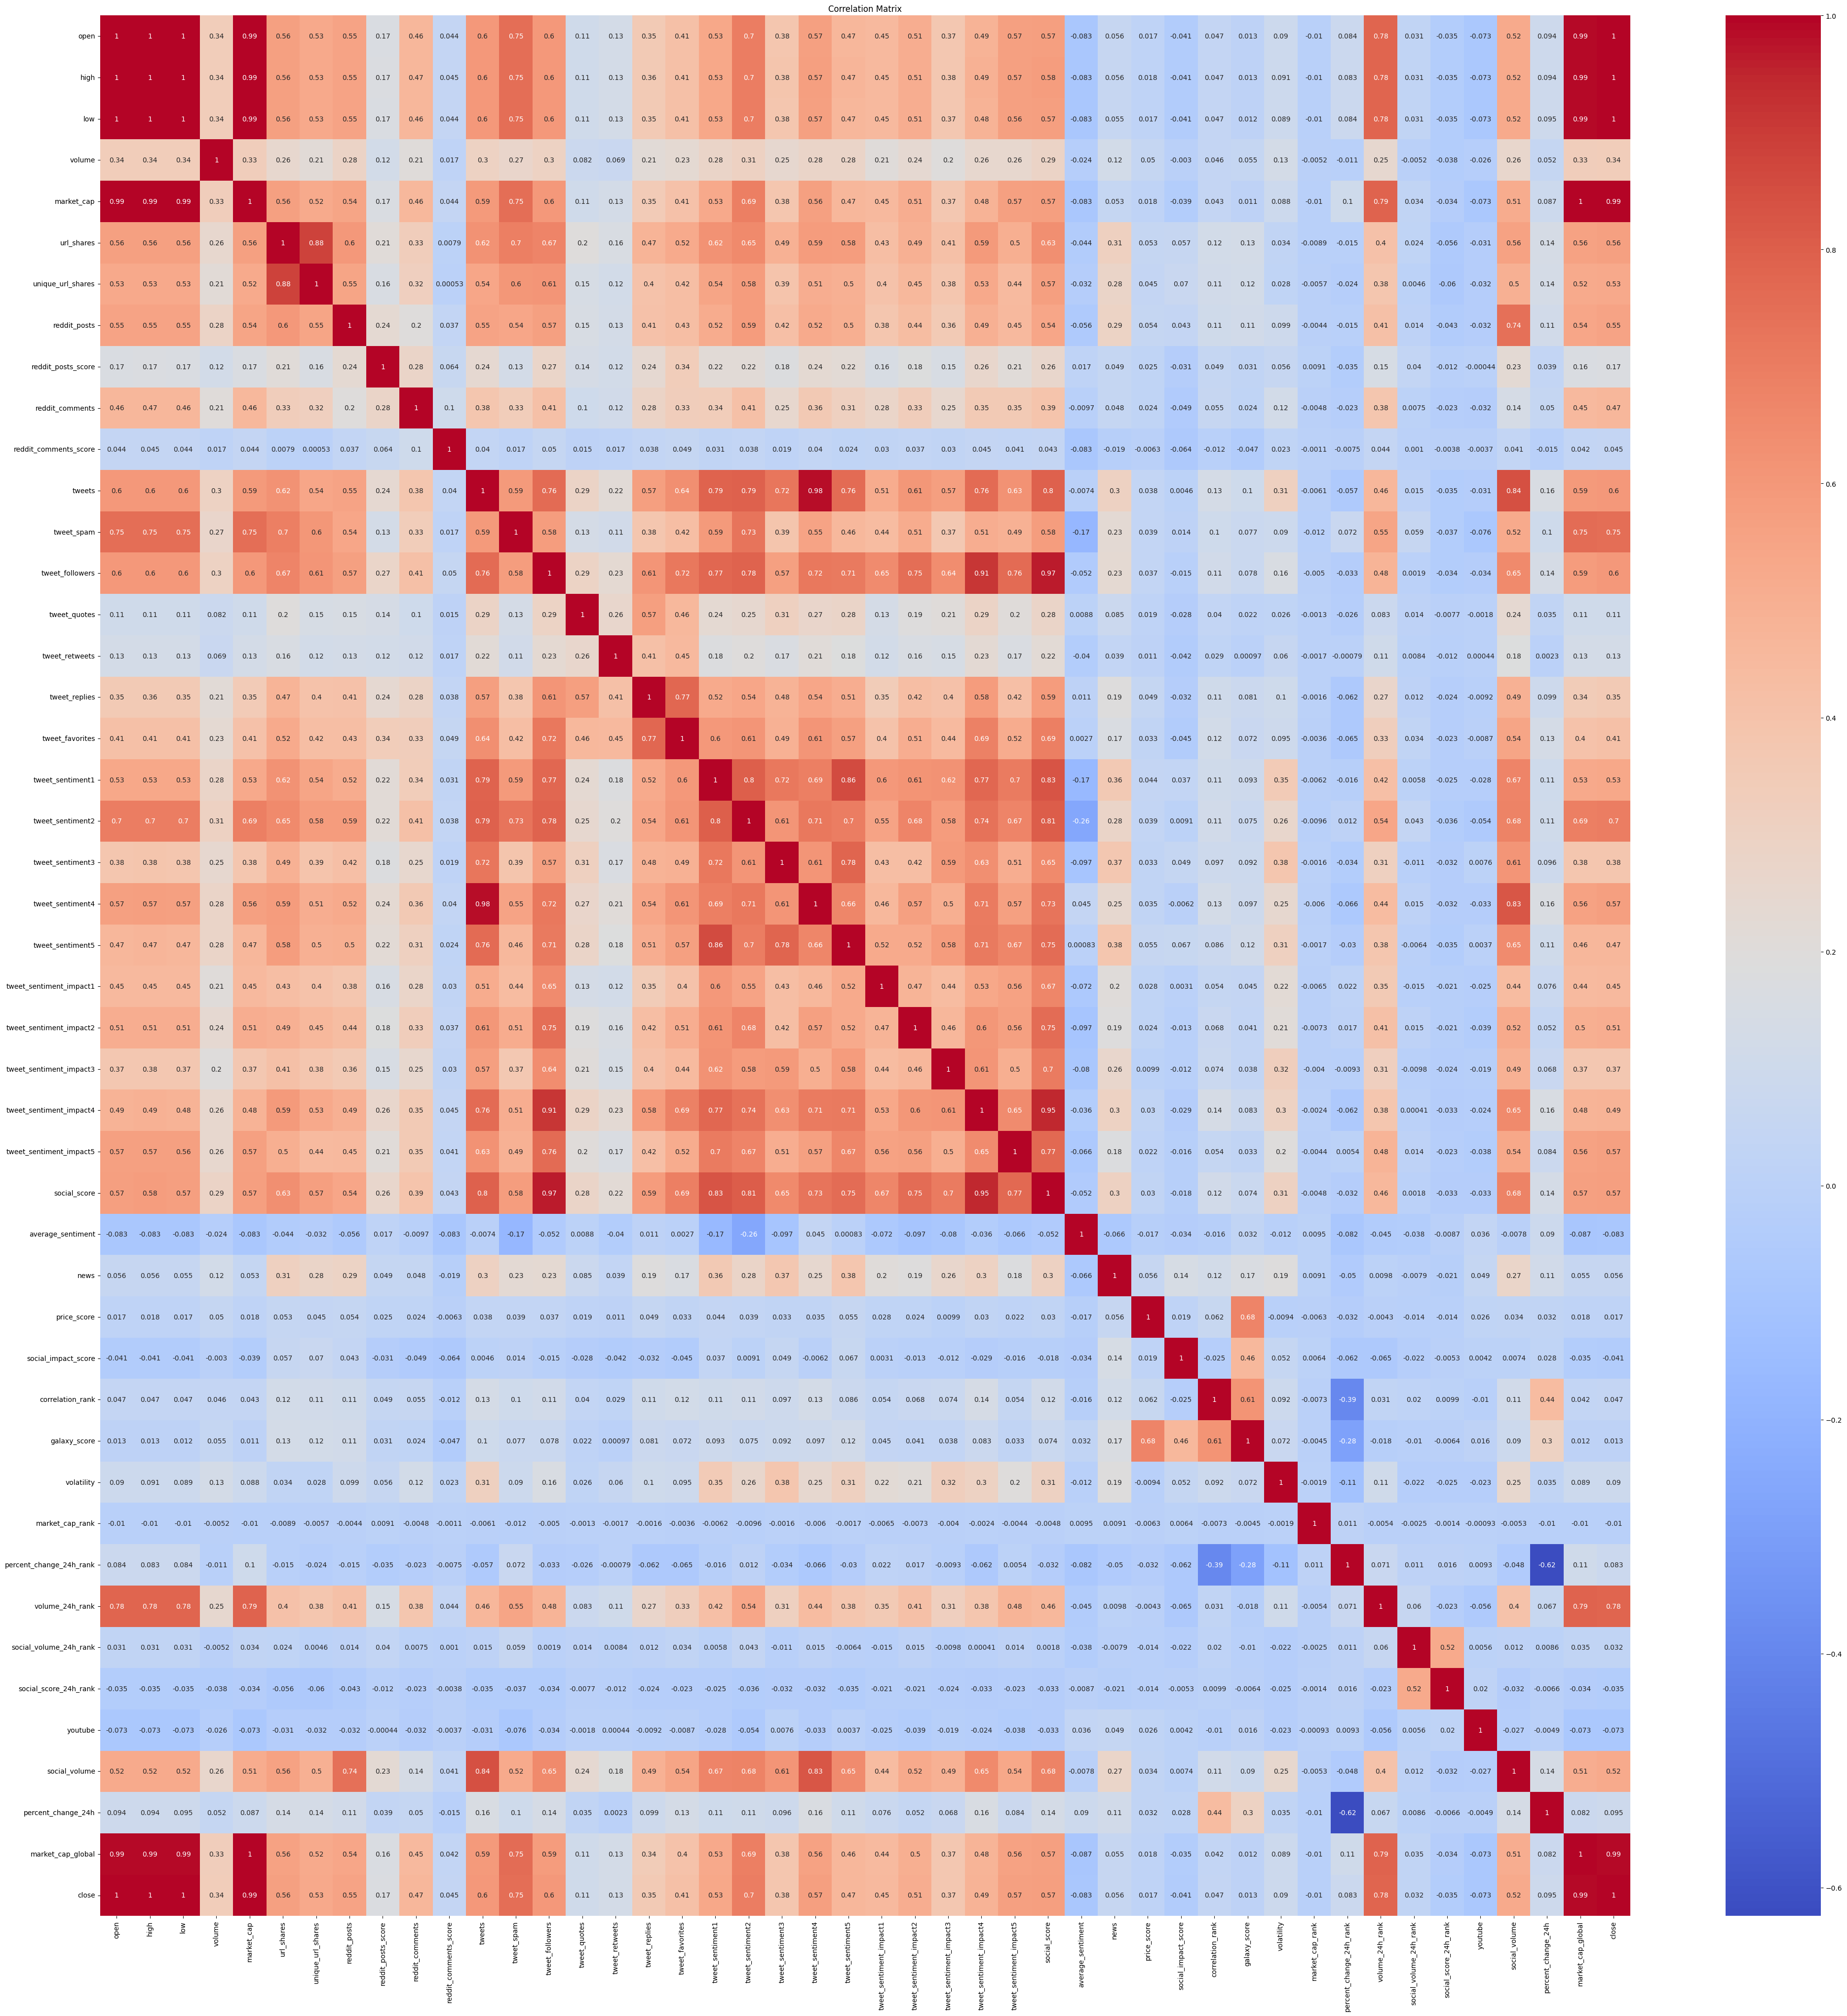

In [ ]:
plt.figure(figsize = (50, 50))
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

Affichage de la variable dépendante en fonction des variables indépendantes

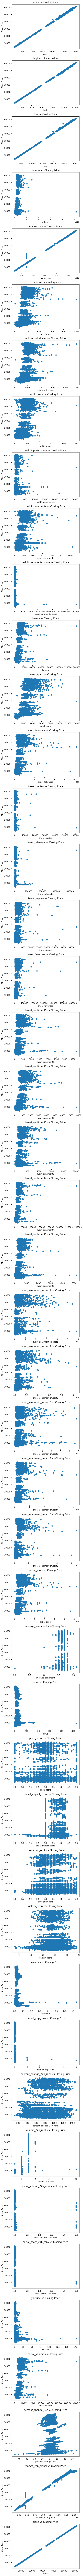

In [ ]:
fig, axs = plt.subplots(df.shape[1], 1, figsize=(6, 4 * df.shape[1]))

for i in range(len(df.columns)):
    axs[i].plot(df[columns[i]], df['close'], 'o')
    axs[i].set_xlabel(columns[i])
    axs[i].set_ylabel('Close Price')
    axs[i].set_title(f'{columns[i]} vs Closing Price')

plt.tight_layout()
plt.show()

Visualisation des Boxplot pour dételcter les outliers

IndexError: ignored

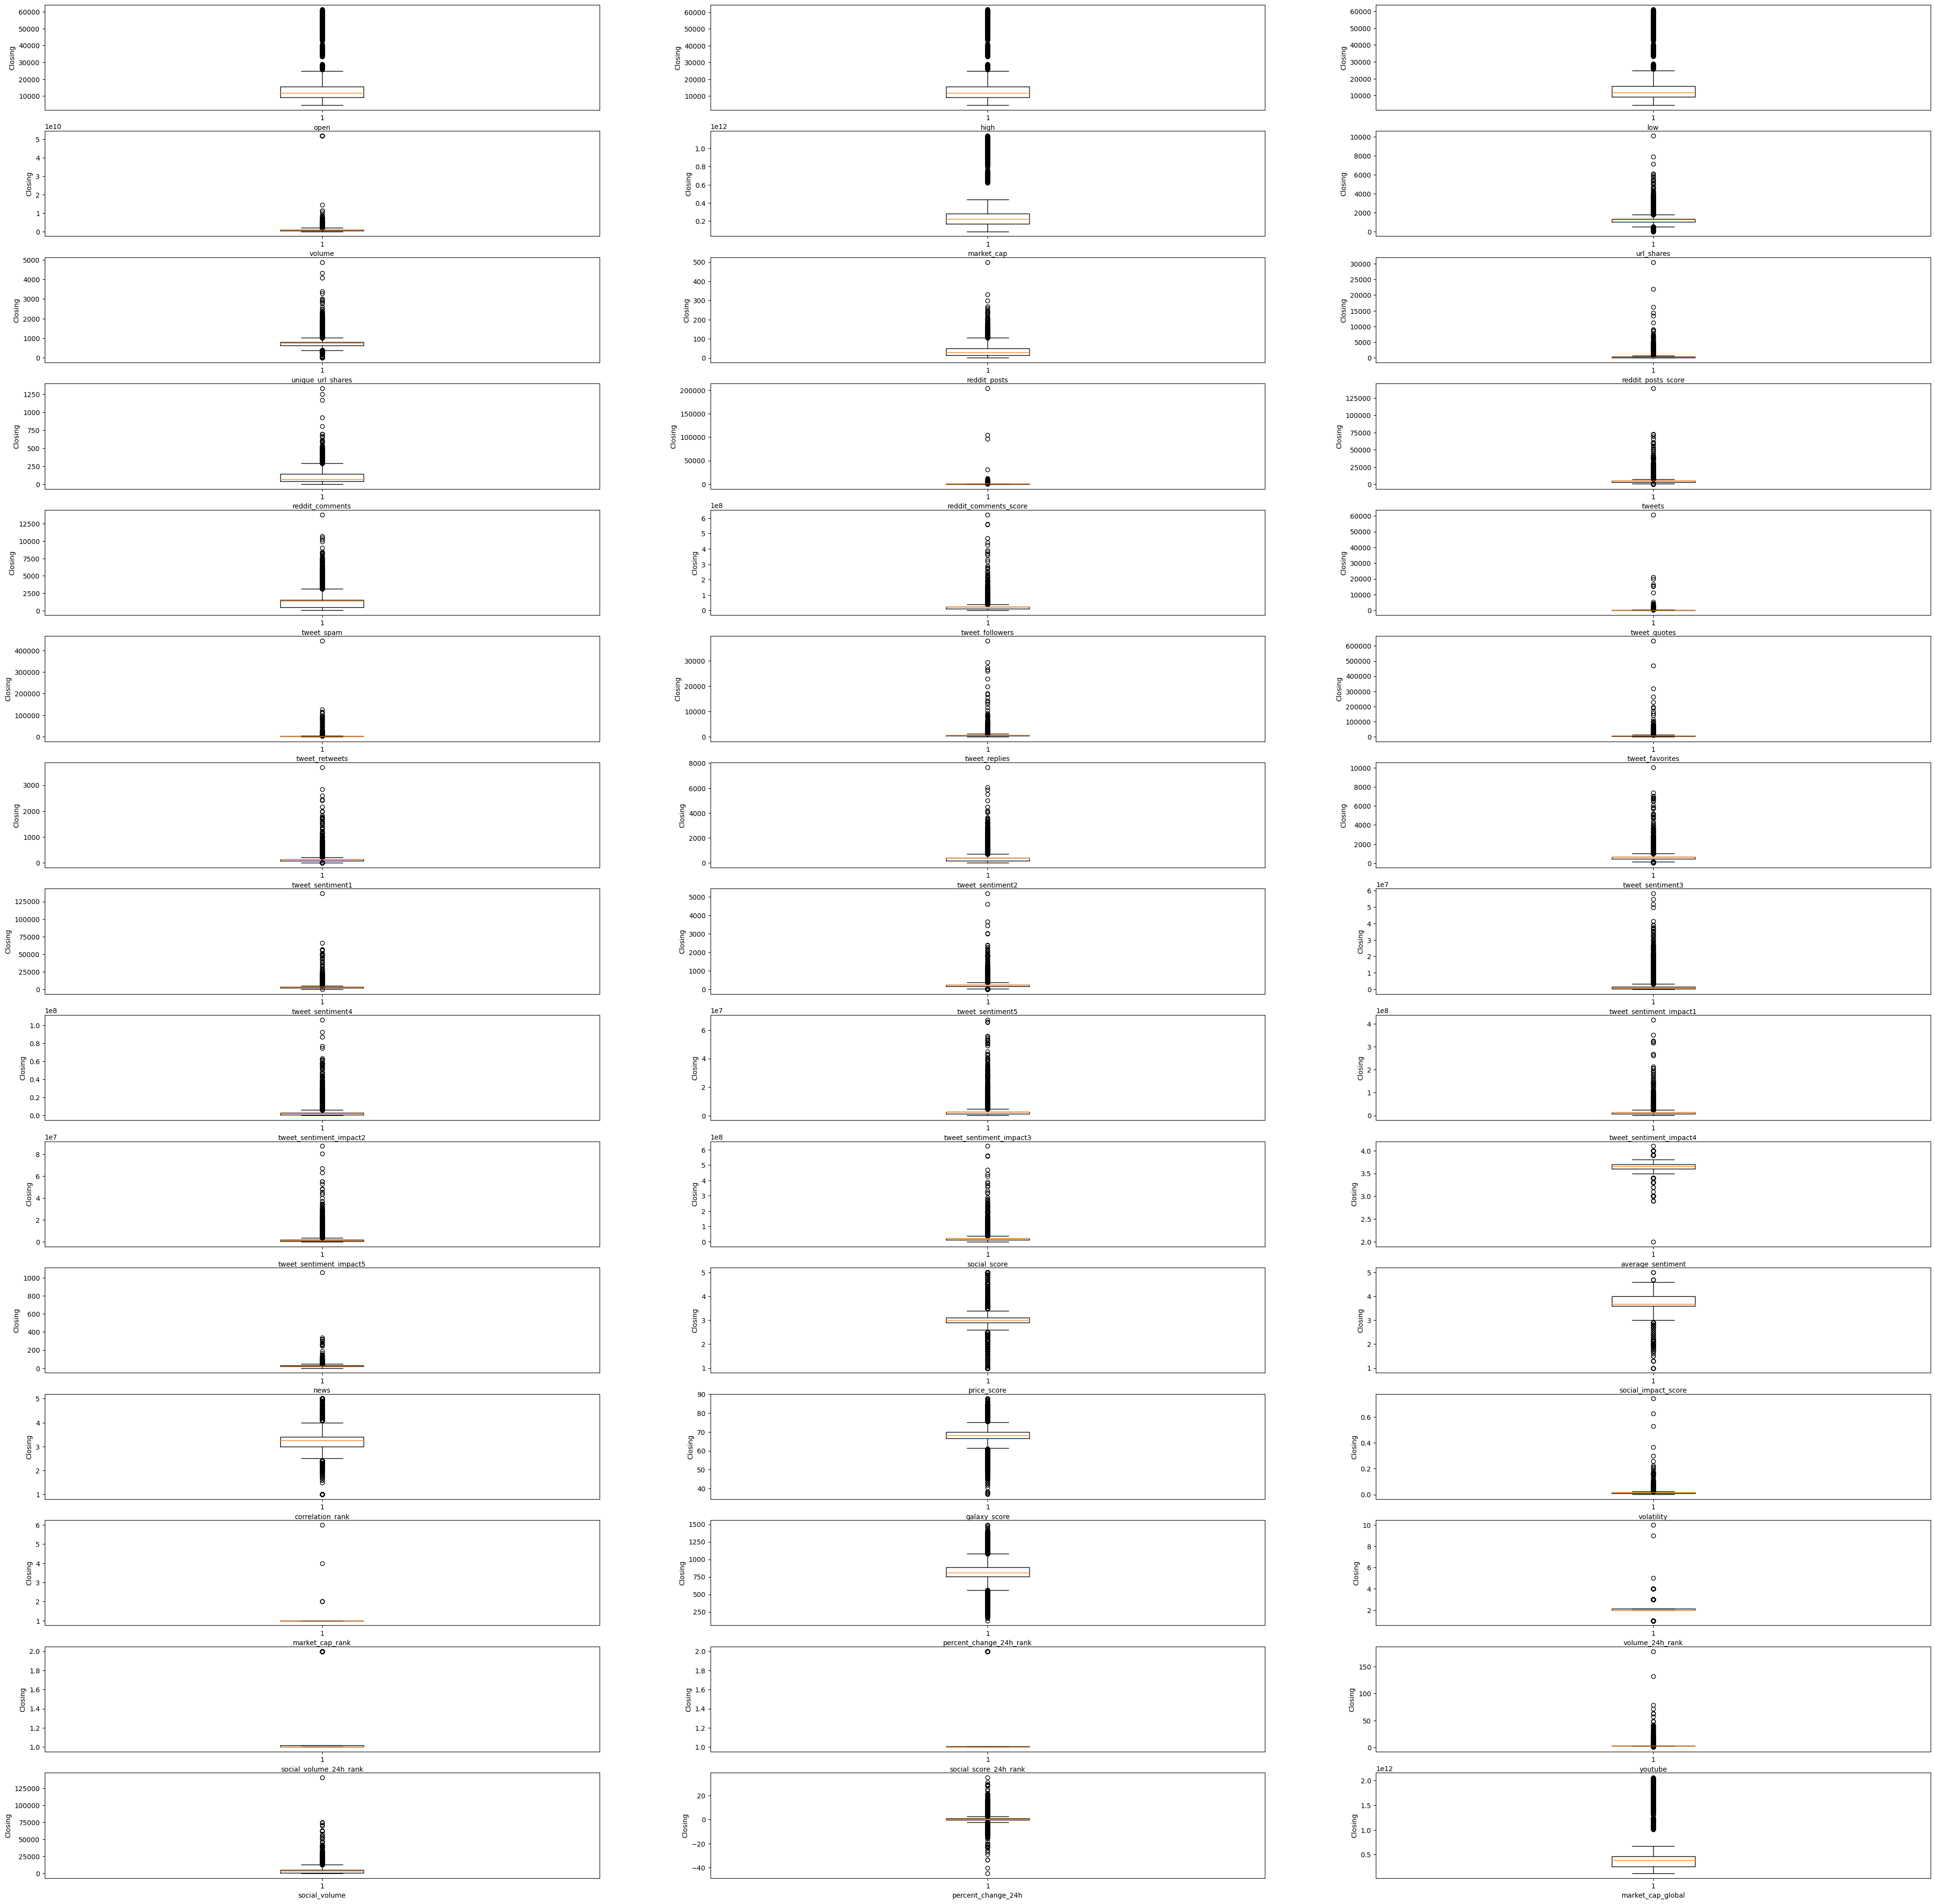

In [ ]:
fig, axs = plt.subplots(15, 3, figsize=(50, 50))
for i in range(len(df.columns)):
    row = i // 3
    col = i % 3
    axs[row, col].boxplot(df.iloc[:, i])
    axs[row, col].set_xlabel(columns[i])
    axs[row, col].set_ylabel('Closing')
plt.tight_layout()
plt.suptitle('Box Plots', y=1.02)
plt.show()

Visualisations des histogrammes pour voir les distributions des variables

IndexError: ignored

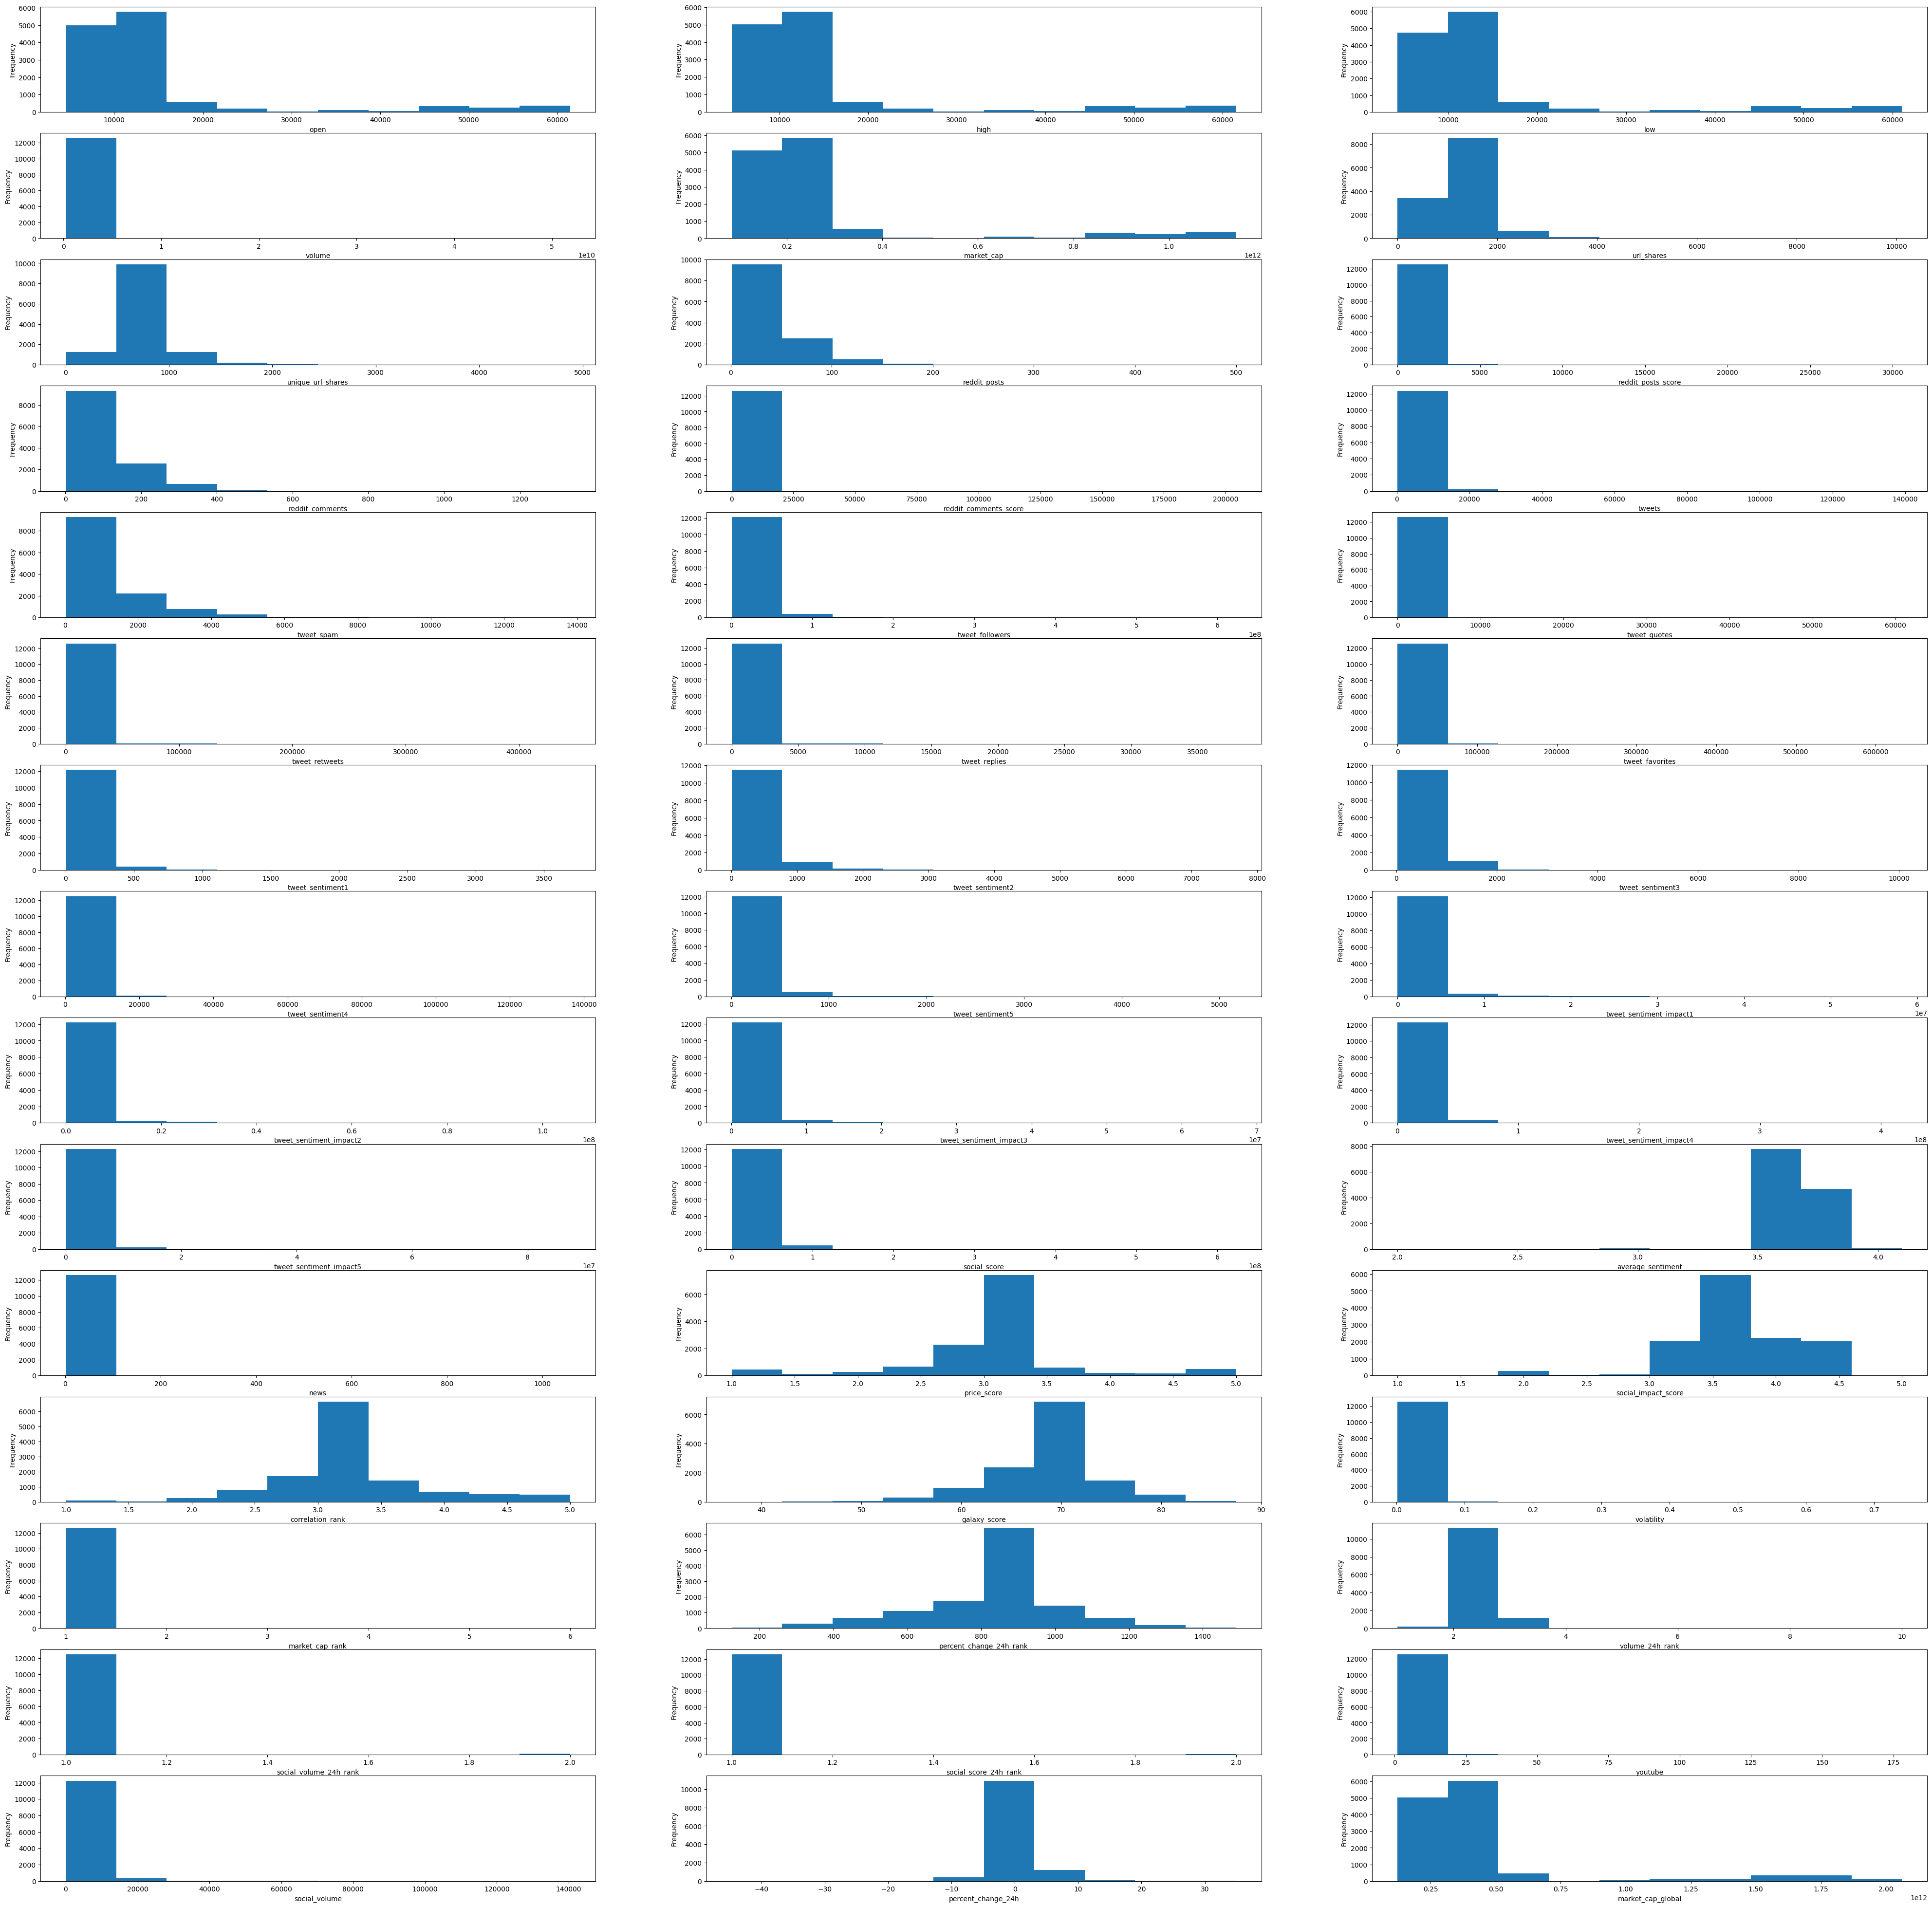

In [ ]:
fig, axs = plt.subplots(15, 3, figsize=(50, 50))
for i in range(len(df.columns)):
    row = i // 3
    col = i % 3
    axs[row, col].hist(df.iloc[:, i], bins=10)
    axs[row, col].set_xlabel(columns[i])
    axs[row, col].set_ylabel('Frequency')
plt.tight_layout()
plt.suptitle('Histograms', y=1.02)
plt.show()

Normalisation des variables

In [ ]:
new_df = df.copy()
for col in columns:
    new_df[col] =  (new_df[col] - new_df[col].min()) / (new_df[col].max() - new_df[col].min())

In [ ]:
new_df

open      high       low    volume  market_cap  url_shares  \
0      0.085780  0.085014  0.090757  0.009218    0.084984    0.166947   
1      0.060500  0.059777  0.065139  0.003160    0.055590    0.090846   
2      0.785331  0.787188  0.788664  0.053863    0.787877    0.142900   
3      0.192736  0.192731  0.196851  0.020600    0.187956    0.123237   
4      0.105351  0.104467  0.107691  0.017681    0.102350    0.099951   
...         ...       ...       ...       ...         ...         ...   
12627  0.192736  0.192731  0.196851  0.020600    0.187956    0.123237   
12628  0.048351  0.047735  0.053259  0.002796    0.045706    0.059673   
12629  0.075022  0.074544  0.078994  0.042133    0.073978    0.163384   
12630  0.089977  0.089120  0.094670  0.014506    0.088513    0.135972   
12631  0.128399  0.127494  0.132517  0.071233    0.127064    0.095695   

       unique_url_shares  reddit_posts  reddit_posts_score  reddit_comments  \
0               0.167077      0.108216            0.003436         0.045045   
1               0.111111      0.038076            0.017376         0.076577   
2               0.199467      0.142285            0.037698         0.139640   
3               0.154953      0.032064            0.013875         0.200450   
4               0.130381      0.046092            0.001374         0.036787   
...                  ...           ...                 ...              ...   
12627           0.154953      0.002004            0.001996         0.102853   
12628           0.094301      0.030060            0.007101         0.028529   
12629           0.154777      0.146293            0.008148         0.044294   
12630           0.134276      0.076152            0.002651         0.031532   
12631           0.122591      0.070140            0.004450         0.033033   

       ...  market_cap_rank  percent_change_24h_rank  volume_24h_rank  \
0      ...         0.000000                 0.352855         0.111111   
1      ...         0.000000                 0.501844         0.125337   
2      ...         0.000000                 0.415813         0.222222   
3      ...         0.000265                 0.501844         0.125337   
4      ...         0.000000                 0.457540         0.111111   
...    ...              ...                      ...              ...   
12627  ...         0.000265                 0.501844         0.125337   
12628  ...         0.000000                 0.646413         0.111111   
12629  ...         0.000000                 0.581259         0.111111   
12630  ...         0.000000                 0.350659         0.111111   
12631  ...         0.000000                 0.480234         0.000000   

       social_volume_24h_rank  social_score_24h_rank   youtube  social_volume  \
0                    0.000000               0.000000  0.022599       0.031482   
1                    0.018749               0.005921  0.012084       0.015367   
2                    0.000000               0.000000  0.012084       0.075490   
3                    0.018749               0.005921  0.012084       0.002022   
4                    0.000000               0.000000  0.005650       0.028448   
...                       ...                    ...       ...            ...   
12627                0.018749               0.005921  0.012084       0.000990   
12628                0.000000               0.000000  0.012084       0.014377   
12629                0.000000               0.000000  0.005650       0.041202   
12630                0.000000               0.000000  0.045198       0.033312   
12631                0.000000               0.000000  0.000000       0.025080   

       percent_change_24h  market_cap_global     close  
0                0.579294           0.082205  0.090556  
1                0.530388           0.046575  0.064926  
2                0.623350           0.726011  0.787008  
3                0.565990           0.174930  0.197221  
4                0.594051           0.111529  0.10

In [ ]:
x = np.array(new_df.iloc[:, :-1])
y = np.array(new_df.iloc[:, -1])
y

array([0.09055574, 0.06492579, 0.78700779, ..., 0.08003084, 0.09459005,
       0.13208346])

Diviser le dataset on train/test données

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=.3, random_state = 42)

Performons un Backward Elimination pour éliminer les colonnes non fortement corrélés

In [ ]:
import statsmodels.api as sm

def backward_elimination_ols(X, y, significance_level=0.05):
    num_vars = X.shape[1]
    initial_features = list(range(num_vars))
    selected_features = list(range(num_vars))
    deleted_indexes = []

    while len(selected_features) > 0:
        X_subset = X[:, selected_features]
        X_ols = sm.add_constant(X_subset)
        ols_model = sm.OLS(y, X_ols)
        results = ols_model.fit()
        max_p_value = max(results.pvalues[1:])

        if max_p_value > significance_level:
            max_p_index = results.pvalues[1:].argmax()
            deleted_indexes.append(selected_features[max_p_index])
            del selected_features[max_p_index]
        else:
            break

    return selected_features, deleted_indexes


In [ ]:
selected, deleted = backward_elimination_ols(X_train, y_train)

In [ ]:
selected

[0, 1, 2, 4, 6, 16, 17, 19, 20, 27, 28, 35, 38, 43, 44]

In [ ]:
cols = []
for i in selected:
    cols.append(new_df.columns[i])
print(cols)

['open', 'high', 'low', 'market_cap', 'unique_url_shares', 'tweet_replies', 'tweet_favorites', 'tweet_sentiment2', 'tweet_sentiment3', 'tweet_sentiment_impact5', 'social_score', 'volatility', 'volume_24h_rank', 'percent_change_24h', 'market_cap_global']


Supprimer les variables non fortement corrélés

In [ ]:
x_selected = X_train[:, selected]

In [ ]:
x_selected_test = X_test[:, selected]

Entrainement et prédicition des modèles suivants:
Linéaire, Ridge, Polynomial, Arbre de décision, Foret Aléatoire

In [ ]:
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor


********** LinearRegression Model **********



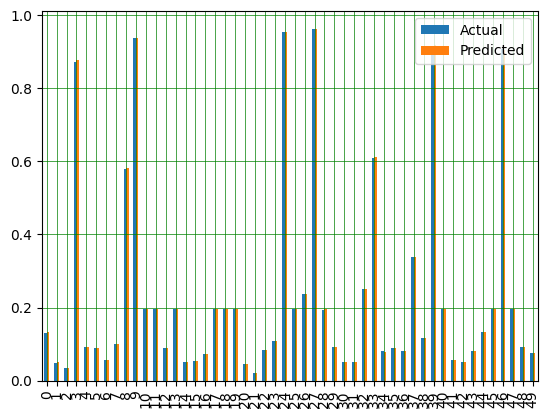


	Coeffitients: 
                            Coeff
open                    -0.608380
high                     0.883048
low                      0.722816
market_cap              -0.003753
unique_url_shares        0.000682
tweet_replies            0.001432
tweet_favorites         -0.009266
tweet_sentiment2         0.001356
tweet_sentiment3         0.001213
tweet_sentiment_impact5  0.001697
social_score            -0.002029
volatility              -0.001355
volume_24h_rank         -0.001135
percent_change_24h       0.000617
market_cap_global        0.003779

	Statistics:
MSE: 1.4943358087512906e-06
RMSE: 0.0012224302878901892
R^2: 0.9999643668625146
Adjusted R^2: 0.9999641845647443
Accuracy: 99.99803624861026 %

********** Ridge Model **********



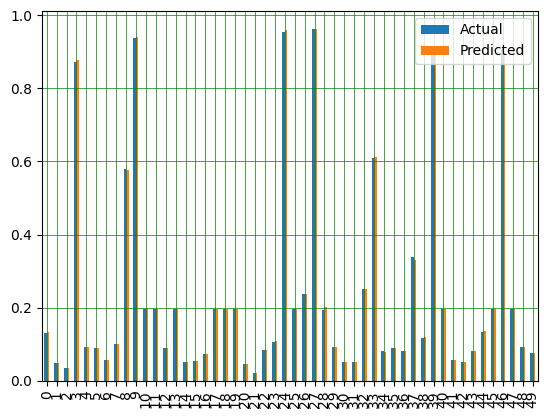


	Coeffitients: 
                            Coeff
open                     0.300499
high                     0.315350
low                      0.310672
market_cap               0.046332
unique_url_shares        0.001126
tweet_replies            0.004814
tweet_favorites         -0.003101
tweet_sentiment2         0.005810
tweet_sentiment3        -0.000989
tweet_sentiment_impact5  0.002557
social_score            -0.001973
volatility               0.000262
volume_24h_rank         -0.000483
percent_change_24h       0.006502
market_cap_global        0.024940

	Statistics:
MSE: 5.2676044367882884e-06
RMSE: 0.002295126235479933
R^2: 0.9998743915042283
Adjusted R^2: 0.999873748895962
Accuracy: 99.98963387512912 %

********** Polynomial Model **********



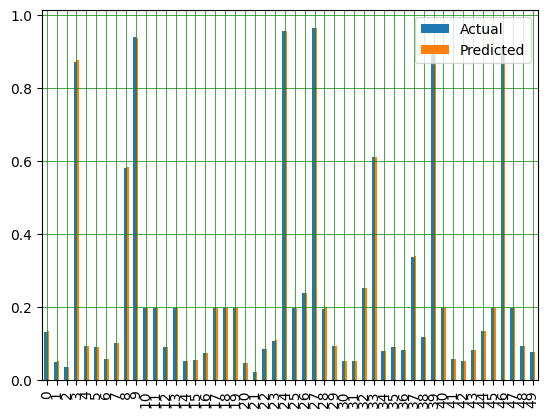


	Statistics:
MSE: 1.4620754412994767e-06
RMSE: 0.0012091631160846235
R^2: 0.9999651361260911
Adjusted R^2: 0.9999649577638439
Accuracy: 99.99898106257629 %



********** DecisionTree Model **********



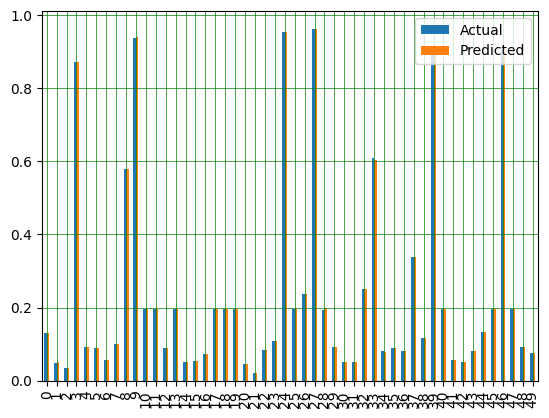


	Statistics:
MSE: 4.259273837264159e-06
RMSE: 0.0020638008230602486
R^2: 0.9998984356197967
Adjusted R^2: 0.9998979160203073
Accuracy: 100.0 %



********** RandomForest Model **********



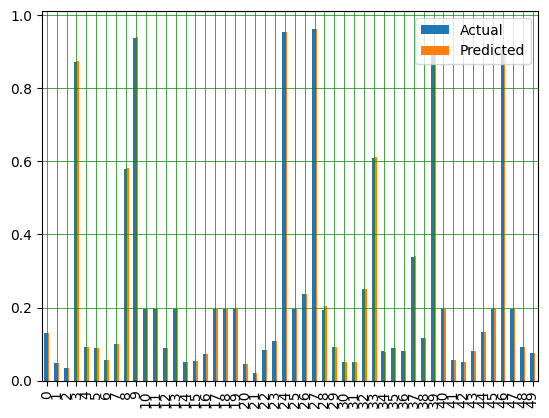


	Statistics:
MSE: 1.3116093396796476e-06
RMSE: 0.0011452551417390133
R^2: 0.9999687240607805
Adjusted R^2: 0.9999685640542701
Accuracy: 99.9994512168637 %




In [ ]:
models = {'LinearRegression': LinearRegression(),
          'Ridge': Ridge(),
         'Polynomial': make_pipeline(PolynomialFeatures(2), LinearRegression()),
         'DecisionTree': DecisionTreeRegressor(random_state = 0),
          'RandomForest': RandomForestRegressor(n_estimators = 10, random_state = 0)}
for name, model in models.items():
    model.fit(x_selected, y_train)
    y_pred = model.predict(x_selected_test)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, y_pred)
    adjusted_r2 = 1 - (1 - r2) * (len(X_train) - 1) / (len(X_train) - len(X_train[0]) - 1)
    print(f"\n********** {name} Model **********\n")
    df1 = pd.DataFrame({'Actual': y_test[:50].flatten(), 'Predicted': y_pred[:50].flatten()})
    df1.plot(kind='bar')
    plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
    plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
    plt.show()
    if name == 'LinearRegression' or name == 'Ridge':
        print(f"\n\tCoeffitients: \n{pd.DataFrame(model.coef_, cols, columns = ['Coeff'])}\n\n\tStatistics:\nMSE: {mse}\nRMSE: {rmse}\nR^2: {r2}\nAdjusted R^2: {adjusted_r2}\nAccuracy: {model.score(x_selected, y_train) * 100} %")
    else:
        print(f"\n\tStatistics:\nMSE: {mse}\nRMSE: {rmse}\nR^2: {r2}\nAdjusted R^2: {adjusted_r2}\nAccuracy: {model.score(x_selected, y_train) * 100} %\n\n")

**Interprétation des résultats:**

Après avoir entrainer les modèles précédents, Tous les modèles avaient des bons résultats que nous pouvons compter pour prédire des nouvelles entrées. Le modèle linéaire apparait d'etre le meilleur dans ce cas, prenons en compte la plus haute valeur de R quarré ajustée, et la plus petite valeur de l'éreur quarré.